In [3]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install torch torchvision torchaudio


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install pillow


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
import torch


In [10]:
image = Image.open("content.jpg").convert('RGB')


In [11]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

C:\Users\Rutuja\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Rutuja\.cache\huggingface\hub\models--Salesforce--blip-image-captioning-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs.hf.co/repos/f1/cb/f1cbe4cfb2a267026632ce513d5918162e03df2ee28456145ba8a1d25cf39aad/9339497cee045b8434a4ebf8f5a30e2f83984e7695a53030e99283a5786693d9?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1746790071&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0Njc5MDA3MX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy9mMS9jYi9mMWNiZTRjZmIyYTI2NzAyNjYzMmNlNTEzZDU5MTgxNjJlMDNkZjJlZTI4NDU2MTQ1YmE4YTFkMjVjZjM5YWFkLzkzMzk0OTdjZWUwNDViODQzNGE0ZWJmOGY1YTMwZTJmODM5ODRlNzY5NWE1MzAzMGU5OTI4M2E1Nzg2NjkzZDk%7EcmVzcG9uc2UtY29udGVudC1kaXNwb3NpdGlvbj0qIn1dfQ__&Signature=PeYVgVCpHy7Etlqyq8vVaTdybyCaFMuYVuQ8Ul7lvWHz013bFA8QyBxF97zH0TiXPqZ1u%7EDqZ7sx-E475wWSb6trJdlFayq6xwEZneBCjrpUWgStZxsp5ZAB7GKpHmfwNEMDZoXmAkowYGhOEJeS%7EL9clVRvoNWy-p5RI3kU3Oh1pX9XhZ%7EwijuTAhNEvnm-RdBL87OMjgehoKqxrHLckF6o5K8%7EbVoC5UShxRsXoHyvPhjoaW0ZaGo0ft09nyB7LQX

In [12]:
inputs = processor(images=image, return_tensors="pt")
out = model.generate(**inputs, max_length=50)
caption = processor.decode(out[0], skip_special_tokens=True)

print("Generated Caption:", caption)


Generated Caption: a red flower


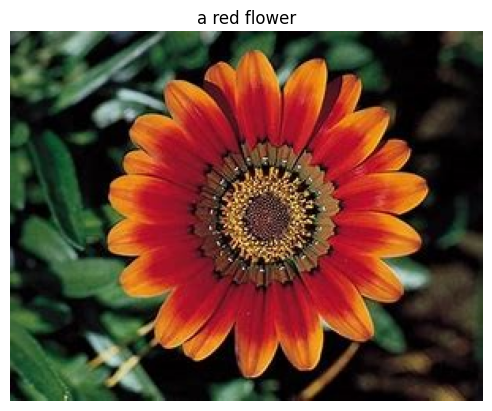

model.safetensors:  42%|####2     | 724M/1.71G [00:00<?, ?B/s]

model.safetensors:  42%|####2     | 724M/1.71G [00:00<?, ?B/s]

In [13]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.title(caption)
plt.axis('off')
plt.show()
